# Дерево решений

- Разделение данных: Алгоритм рекурсивно разделяет данные на подмножества, используя признаки (features). На каждом шаге выбирается признак и пороговое значение, которые лучше всего разделяют данные, минимизируя ошибку предсказания (например, среднеквадратичную ошибку, MSE).

- Критерий разделения: Для регрессии обычно используется критерий, такой как MSE (Mean Squared Error). Алгоритм выбирает разделение, которое минимизирует MSE в каждом подмножестве.

- Рекурсивное построение дерева: Процесс разделения продолжается до тех пор, пока не будет достигнуто условие остановки (например, максимальная глубина дерева, минимальное количество образцов в листе и т.д.).

**Предсказание:** Когда дерево построено, предсказание для нового образца делается путем прохождения по дереву от корня до листа. В листе находится среднее значение целевой переменной для всех образцов, попавших в этот лист.

![dt_sample](./lecture4/dt_example.png)

Mean Squared Error: 0.029658270897523365


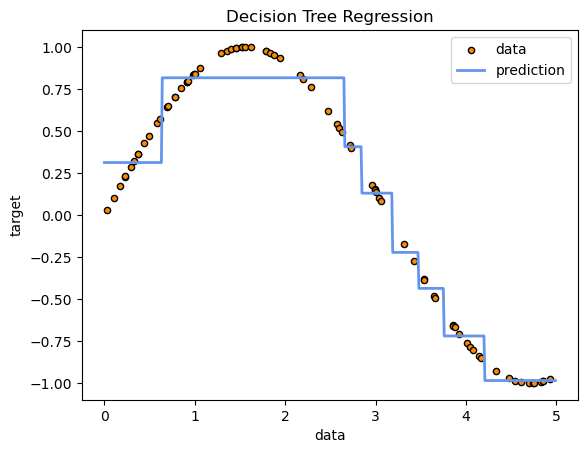

In [7]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Создание синтетических данных
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + 0.*np.random.normal(0, 0.1, X.shape[0])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели дерева решений для регрессии
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = regressor.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Визуализация результатов
X_grid = np.arange(0, 5, 0.01)[:, np.newaxis]
y_grid = regressor.predict(X_grid)

plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_grid, y_grid, color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Ансамблевые алгоритмы

### Алгоритм случайного леса для регрессии

![rf](./lecture4/rf.png)
Случайный лес (Random Forest) — это ансамблевый алгоритм, который объединяет предсказания множества деревьев решений для повышения точности и устойчивости модели. Вот ключевые этапы его работы:

- Бутстрэп-агрегирование (бэггинг):

  - Из исходного набора данных создается множество подвыборок (с повторениями).

  - Для каждой подвыборки строится отдельное дерево решений.

- Случайный выбор признаков:

  - При построении каждого дерева на каждом шаге разделения используется случайное подмножество признаков.

  - Это уменьшает корреляцию между деревьями и снижает риск переобучения.

**Предсказание:**

Каждое дерево дает свой прогноз для регрессионной задачи.

Итоговый результат — среднее арифметическое всех предсказаний деревьев.

**Контроль переобучения:**

Благодаря бэггингу и случайности в выборе признаков, модель становится устойчивой к шуму в данных.

MSE: 0.02
R²: 0.97


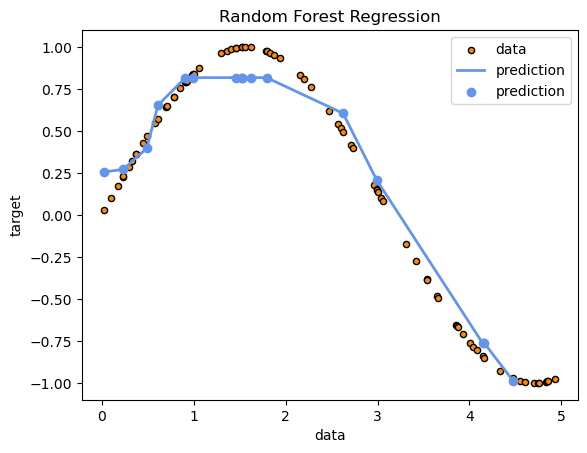

In [23]:
# Импорт библиотек
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Создание синтетических данных
np.random.seed(42)
X = np.sort(5 * np.random.rand(80,1), axis=0)
y = np.sin(X).ravel() + 0.0*np.random.normal(0, 0.1, X.shape[0])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели случайного леса, выбор гиперпараметров
model = RandomForestRegressor(
    n_estimators=105,  # Количество деревьев
    max_depth=3,      # Максимальная глубина дерева
    random_state=42
)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

import matplotlib.pyplot as plt
# Визуализация результатов
X_test = np.sort(X_test, axis=0)
y_pred = model.predict(X_test)


plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction", linewidth=2)
plt.scatter(X_test, y_pred, color="cornflowerblue", label="prediction")

plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

In [17]:
np.shape(X_test)

(16, 1)